Support Efficienc MLOPS Project

Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
This project aims to predict predict **issue complexity**, **routing (team assignment)**, and **resolution time**, and measure the **causal effect of automation (bots)** on efficiency for case resolution.

2) Data Collection
Dataset Source - https://huggingface.co/datasets/bigcode/the-stack-github-issues
The data consists of 3M rows of which I will only work with 500,000 and 8 columns 

2.1 Import Data and Required Packages

In [42]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#hf auth login needed before continuing


In [22]:

# # Load only the "train" split (the only one available)
# dataset_iter = load_dataset(
#     "bigcode/the-stack-github-issues",
#     split="train",
#     streaming=True,
#     use_auth_token=True
# )

In [23]:
# Take first 500k examples from the stream
# dataset_head = list(dataset_iter.take(400_000))

In [24]:
#read in csv
import pandas as pd 
df = pd.read_parquet('../artifacts/train-00000-of-00127.parquet')

In [25]:
df.head()

,repo,issue_id,issue_number,pull_request,events,text_size,content,usernames
0,habari/habari,1118963,18,None,"[{'action': 'opened', 'author': 'HabariImporte...",605,<issue_start><issue_comment>Title: Simple File...,"[""HabariImporter"", ""Heilemann"", ""Konzertheld""]"
1,rails/rails,3362540,5145,None,"[{'action': 'opened', 'author': 'batter', 'com...",3308,<issue_start><issue_comment>Title: Asset Pipel...,"[""batter"", ""JonyGreen3""]"
2,rails-sqlserver/activerecord-sqlserver-adapter,6843645,230,None,"[{'action': 'opened', 'author': 'michiels', 'c...",2251,<issue_start><issue_comment>Title: Initializin...,"[""metaskills"", ""michiels""]"
3,mapbox/carto,9530585,227,None,"[{'action': 'opened', 'author': 'tmcw', 'comme...",228,<issue_start><issue_comment>Title: Support tru...,"[""tmcw""]"
4,defunkt/github-gem,10221507,95,None,"[{'action': 'opened', 'author': 'gavinhughes',...",1241,<issue_start><issue_comment>Title: `create` fa...,"[""myfairsyer"", ""gavinhughes""]"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243961 entries, 0 to 243960
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   repo          243961 non-null  object
 1   issue_id      243961 non-null  int64 
 2   issue_number  243961 non-null  int64 
 3   pull_request  79589 non-null   object
 4   events        243961 non-null  object
 5   text_size     243961 non-null  int64 
 6   content       243961 non-null  object
 7   usernames     243961 non-null  object
dtypes: int64(3), object(5)
memory usage: 14.9+ MB


In [27]:
df[df['pull_request'].notna()]

,repo,issue_id,issue_number,pull_request,events,text_size,content,usernames
22,ccgus/fmdb,25832291,224,"{'number': 224.0, 'repo': 'fmdb', 'user_login'...","[{'action': 'opened', 'author': 'mikeash', 'co...",1473,<issue_start><issue_comment>Title: Add a deadl...,"[""778477"", ""mikeash""]"
34,django-tastypie/django-tastypie,32340702,1169,"{'number': 1169.0, 'repo': 'django-tastypie', ...","[{'action': 'opened', 'author': 'graingert', '...",353,<issue_start><issue_comment>Title: Tastypie se...,"[""SeanHayes"", ""graingert""]"
48,rsim/oracle-enhanced,38548937,470,"{'number': 470.0, 'repo': 'oracle-enhanced', '...","[{'action': 'opened', 'author': 'sarsena', 'co...",1474,<issue_start><issue_comment>Title: removing du...,"[""sarsena"", ""mxhold"", ""yahonda"", ""senguidanos""]"
51,ekmett/intervals,40759989,29,"{'number': 29.0, 'repo': 'intervals', 'user_lo...","[{'action': 'opened', 'author': 'dmcclean', 'c...",417,<issue_start><issue_comment>Title: Conservativ...,"[""ekmett"", ""dmcclean""]"
54,ManageIQ/manageiq,42549282,567,"{'number': 567.0, 'repo': 'manageiq', 'user_lo...","[{'action': 'opened', 'author': 'lfu', 'commen...",803,<issue_start><issue_comment>Title: Check the u...,"[""dclarizio"", ""chessbyte"", ""lfu""]"
...,...,...,...,...,...,...,...,...
243936,kiegroup/kie-wb-common,233544972,918,"{'number': 918.0, 'repo': 'kie-wb-common', 'us...","[{'action': 'opened', 'author': 'alepintus', '...",546,<issue_start><issue_comment>Title: JBPM-5862-2...,"[""manstis"", ""romartin"", ""alepintus"", ""hasys""]"
243943,deeplearning4j/deeplearning4j,234415823,3499,"{'number': 3499.0, 'repo': 'deeplearning4j', '...","[{'action': 'opened', 'author': 'kepricon', 'c...",288,<issue_start><issue_comment>Title: add Pipelin...,"[""kepricon""]"
243944,pinterest/bonsai,234437050,33,"{'number': 33.0, 'repo': 'bonsai', 'user_login...","[{'action': 'opened', 'author': 'ryan953', 'co...",219,"<issue_start><issue_comment>Title: Add icons, ...","[""ryan953""]"
243946,zxing/zxing,234515181,811,"{'number': 811.0, 'repo': 'zxing', 'user_login...","[{'action': 'opened', 'author': 'PhilLab', 'co...",751,<issue_start><issue_comment>Title: Fixed Wifi ...,"[""srowen"", ""PhilLab""]"


In [28]:
#(drop pull requests) with values and keep those with None 
df2 = df[df["pull_request"].isna()].reset_index(drop=True)

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164372 entries, 0 to 164371
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   repo          164372 non-null  object
 1   issue_id      164372 non-null  int64 
 2   issue_number  164372 non-null  int64 
 3   pull_request  0 non-null       object
 4   events        164372 non-null  object
 5   text_size     164372 non-null  int64 
 6   content       164372 non-null  object
 7   usernames     164372 non-null  object
dtypes: int64(3), object(5)
memory usage: 10.0+ MB


In [30]:
#drop the column pull requests
df2.drop(columns='pull_request',inplace=True)

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164372 entries, 0 to 164371
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   repo          164372 non-null  object
 1   issue_id      164372 non-null  int64 
 2   issue_number  164372 non-null  int64 
 3   events        164372 non-null  object
 4   text_size     164372 non-null  int64 
 5   content       164372 non-null  object
 6   usernames     164372 non-null  object
dtypes: int64(3), object(4)
memory usage: 8.8+ MB


### 2.2 Dataset information

- repo : repository name where the issue belongs -> (e.g., "rails/rails", "mapbox/carto")
- issue_id : unique identifier for the issue -> (numeric ID across all repos)
- issue_number : issue number within the repository -> (e.g., 18, 227, 5145)
- events : sequence of actions/events on the issue -> (e.g., opened, closed, commented, assigned)
- text_size : size of the issue content in characters -> (integer length of text)
- content : raw issue text/content -> (title, description, and discussion body)
- usernames : list of users involved in the issue -> (reporter, commenters, assignees)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [32]:
df2.isna().sum()

repo            0
issue_id        0
issue_number    0
events          0
text_size       0
content         0
usernames       0
dtype: int64

### 3.2 Check Duplicates

In [33]:
dup_issue_ids = df2["issue_id"].duplicated().sum()
print(f"Duplicate issue_id values: {dup_issue_ids}")

Duplicate issue_id values: 0


### 3.4 Checking the number of unique values of each column

In [34]:
df2.columns

Index(['repo', 'issue_id', 'issue_number', 'events', 'text_size', 'content',
       'usernames'],
      dtype='object')

In [35]:
#columns that are not jsons
cols_nonjson = ['repo', 'issue_id', 'issue_number', 'text_size',
       'usernames']

In [36]:
df2[cols_nonjson].nunique()

repo             76646
issue_id        164372
issue_number     19586
text_size        11575
usernames       152759
dtype: int64

## Dataset statistics on text size 

In [37]:
df2['text_size'].describe([.25, .5, .75, .9, .95, .99,]).T

count    164372.000000
mean       1912.174671
std        3881.443726
min         200.000000
25%         471.000000
50%         979.000000
75%        2107.000000
90%        4233.000000
95%        6360.000000
99%       13914.870000
max      810914.000000
Name: text_size, dtype: float64

In [38]:
df2['events'][17455]

array([{'action': 'opened', 'author': 'wisenight', 'comment_id': None, 'datetime': '2019-05-02 01:15:24+00:00', 'masked_author': 'username_0', 'text': '#### What versions are you running?\r\n\r\n<pre>\r\n$ go list -m github.com/chromedp/chromedp\r\nlastest version\r\n$ chromium --version\r\nChromium 74.0.3729.108 snap\r\n$ go version\r\ngo version go1.12 linux/amd64\r\n</pre>\r\n\r\nI have 2 issues.\r\n\r\n1. How can I scroll the screen to a specific position like y to 2000??\r\nAPI seems only has scrollIntoView.\r\n\r\n2. When I use Nodes or Text API, if the selector item is not exists, API will block.\r\nHow can I do if the selector item is not exist, API will return nil or error to me??\r\n\r\nBest regards\r\nWisely', 'title': 'How to scroll page to specific position? API will block if selector is not exist.', 'type': 'issue'},
       {'action': 'created', 'author': 'mvdan', 'comment_id': 488528682.0, 'datetime': '2019-05-02 01:20:24+00:00', 'masked_author': 'username_1', 'text': "P

In [39]:
df2['content'][0]

"<issue_start><issue_comment>Title: Simple File Silo: Errors aren't submitted to message system\nusername_0: Initially reported by: @username_2 as #TRAC453 \nIt'd be nice if the error messages in the simple file silo were using the message system. For instance, trying to create a directory named '/' will create an error.\n<issue_comment>username_1: I wonder if @heilemann still uses Habari and can confirm this is fixed (because it is, as I see it).\n<issue_comment>username_2: Thank you for thinking of me, but no, I'm no longer using Habari.<issue_closed>\n<issue_comment>username_1: Ok. As far as I can see there are no errors that get lost somewhere in the silo, also, we are going to redesign it and will run a lot of tests propably. So I close this and we can open a new one if someone comes across something."

In [40]:
def parse_events_min(events):
    """
    Parse issue events into modeling features:
      - opened_at, closed_at, is_closed
      - lifecycle_hours
      - comment_count
      - first_response_minutes
      - participants_count
    """
    opened_at = None
    closed_at = None
    first_comment_at = None
    first_responder = None
    comment_count = 0
    participants = set()

    # Accept list/tuple/np.ndarray of event dicts
    if isinstance(events, np.ndarray):
        events = events.tolist()
    if not isinstance(events, (list, tuple)):
        return {
            "opened_at": None,
            "closed_at": None,
            "is_closed": False,
            "lifecycle_hours": None,
            "comment_count": 0,
            "first_response_minutes": None,
            "participants_count": 0,
        }

    for ev in events:
        ev_type = (ev.get("type") or "").lower()       # 'issue' | 'comment' | ...
        action  = (ev.get("action") or "").lower()     # 'opened' | 'closed' | 'created' ...
        author  = ev.get("author")
        dt      = pd.to_datetime(ev.get("datetime"), utc=True, errors="coerce")

        if author:
            participants.add(author)

        if ev_type == "issue" and action == "opened" and opened_at is None:
            opened_at = dt
        elif ev_type == "issue" and action == "closed" and closed_at is None:
            closed_at = dt
        elif ev_type == "comment":
            comment_count += 1
            if first_comment_at is None:
                first_comment_at = dt
                first_responder = author

    is_closed = closed_at is not None

    lifecycle_hours = (
        (closed_at - opened_at).total_seconds() / 3600.0
        if opened_at is not None and closed_at is not None
        else None
    )

    first_response_minutes = (
        (first_comment_at - opened_at).total_seconds() / 60.0
        if opened_at is not None and first_comment_at is not None
        else None
    )

    return {
        "opened_at": opened_at,
        "closed_at": closed_at,
        "is_closed": is_closed,
        "lifecycle_hours": lifecycle_hours,
        "comment_count": int(comment_count),
        "first_response_minutes": first_response_minutes,
        "participants_count": int(len(participants)),
    }


In [43]:
# Expand features from events
fe = df2["events"].apply(parse_events_min).apply(pd.Series)

# Join back
df3 = pd.concat([df2.drop(columns=["opened_at","closed_at","is_closed",
                                  "lifecycle_hours","comment_count",
                                  "first_response_minutes","participants_count"], errors="ignore"),
                 fe], axis=1)

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164372 entries, 0 to 164371
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   repo                    164372 non-null  object             
 1   issue_id                164372 non-null  int64              
 2   issue_number            164372 non-null  int64              
 3   events                  164372 non-null  object             
 4   text_size               164372 non-null  int64              
 5   content                 164372 non-null  object             
 6   usernames               164372 non-null  object             
 7   opened_at               163856 non-null  datetime64[ns, UTC]
 8   closed_at               117285 non-null  datetime64[ns, UTC]
 9   is_closed               164372 non-null  bool               
 10  lifecycle_hours         116899 non-null  float64            
 11  comment_count           16

In [45]:
df3['lifecycle_hours'].isna().sum()

47473

In [119]:
df3['lifecycle_hours'][17464]

nan

In [121]:
# Count how many are negative
neg_count = (df3["lifecycle_hours"] < 0).sum()
print("Negative lifecycles:", neg_count)

# Inspect a few
df3[df3["lifecycle_hours"] < 0].head()


Negative lifecycles: 0


,repo,issue_id,issue_number,events,text_size,content,usernames,created_at,opened_at,closed_at,is_closed,lifecycle_hours,first_response_minutes,comment_count,participants_count,lifecycle_reason


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337136 entries, 0 to 337135
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   repo                    337136 non-null  object             
 1   issue_id                337136 non-null  int64              
 2   issue_number            337136 non-null  int64              
 3   events                  337136 non-null  object             
 4   text_size               337136 non-null  int64              
 5   content                 337136 non-null  object             
 6   usernames               337136 non-null  object             
 7   opened_at               336138 non-null  datetime64[ns, UTC]
 8   closed_at               240596 non-null  datetime64[ns, UTC]
 9   is_closed               337136 non-null  bool               
 10  lifecycle_hours         239839 non-null  float64            
 11  comment_count           33

In [23]:
new_cols = ["opened_at",
        "closed_at",
        "is_closed",
        "lifecycle_hours",
        "comment_count",
        "first_response_minutes",
        "participants_count",]

In [24]:
df3[new_cols]

,opened_at,closed_at,is_closed,lifecycle_hours,comment_count,first_response_minutes,participants_count
0,2011-06-27 00:09:06+00:00,2016-12-01 16:05:10+00:00,True,47631.934444,3,2.856938e+06,3
1,2012-02-23 20:34:32+00:00,NaT,False,NaN,1,1.868445e+06,2
2,2012-09-13 10:31:54+00:00,2015-01-26 05:01:30+00:00,True,20754.493333,1,1.245270e+06,2
3,2012-12-27 02:26:05+00:00,2016-03-19 22:38:37+00:00,True,28292.208889,0,NaN,1
4,2013-01-23 05:31:46+00:00,NaT,False,NaN,1,1.998065e+06,2
...,...,...,...,...,...,...,...
337131,2016-01-02 08:45:26+00:00,2016-01-02 12:36:46+00:00,True,3.855556,2,2.313333e+02,2
337132,2016-01-02 22:25:57+00:00,2016-02-06 22:15:29+00:00,True,839.825556,9,2.551350e+03,4
337133,2016-01-03 09:58:39+00:00,2016-03-04 13:08:44+00:00,True,1467.168056,0,NaN,1
337134,2016-01-03 13:58:47+00:00,2016-10-11 22:52:45+00:00,True,6776.899444,2,3.108333e+01,3


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337136 entries, 0 to 337135
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   repo                    337136 non-null  object             
 1   issue_id                337136 non-null  int64              
 2   issue_number            337136 non-null  int64              
 3   events                  337136 non-null  object             
 4   text_size               337136 non-null  int64              
 5   content                 337136 non-null  object             
 6   usernames               337136 non-null  object             
 7   opened_at               336138 non-null  datetime64[ns, UTC]
 8   closed_at               240596 non-null  datetime64[ns, UTC]
 9   is_closed               337136 non-null  bool               
 10  lifecycle_hours         239839 non-null  float64            
 11  comment_count           33

In [34]:
df3[["text_size", "comment_count", "participants_count",
            "first_response_minutes", "lifecycle_hours"]].describe([.25, .5, .75, .9, .95, .99,]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
text_size,337136.0,1916.957029,4032.037513,200.000000,471.000000,978.000000,2109.000000,4251.000000,6352.000000,1.396165e+04,8.109140e+05
comment_count,337136.0,3.105097,6.219464,0.000000,1.000000,2.000000,4.000000,7.000000,11.000000,2.200000e+01,1.786000e+03
participants_count,337136.0,2.318343,2.008385,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,8.000000e+00,2.890000e+02
first_response_minutes,269131.0,64894.755238,260241.778980,-382.333333,47.616667,685.666667,9882.866667,115760.866667,350980.525000,1.321633e+06,9.141719e+06
lifecycle_hours,239839.0,2316.674605,6010.554528,-5.629444,13.979861,158.204167,1418.706250,6702.203111,13047.643806,3.083950e+04,1.444526e+05


In [122]:
#save df3 #300k as raw data in artifacts
df3.to_csv('data/github_data.csv',index=False)

In [35]:
#drop outliers 

# List of numeric columns to clean
num_cols = ["text_size", "comment_count", "participants_count",
            "first_response_minutes", "lifecycle_hours"]

df_clean = df3.copy()

for col in num_cols:
    if col in df_clean.columns:
        cutoff = df_clean[col].quantile(0.99)   # 99th percentile
        df_clean = df_clean[df_clean[col] <= cutoff]

print(f"Original rows: {len(df3):,}")
print(f"After outlier removal: {len(df_clean):,}")

Original rows: 337,136
After outlier removal: 198,305


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize text_size and lifecylce hours distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

In [51]:
def plot_histo(df,col : str,bins,kde = True):

    sns.histplot(df[col], bins=bins, color="seagreen", kde=kde)
    plt.axvline(df[col].median(), color="red", linestyle="--", label="Median")
    plt.axvline(df[col].mean(), color="blue", linestyle="--", label="Mean")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

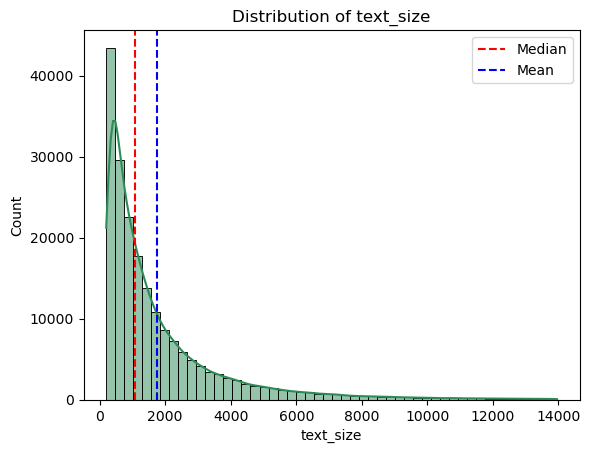

In [87]:
#TEXT SIZE
plot_histo(df_clean,'text_size',50)

The text_size data is not normally distributed and is skewed to the right with most of the data having smaller text size but some data points pulling the mean to the right.

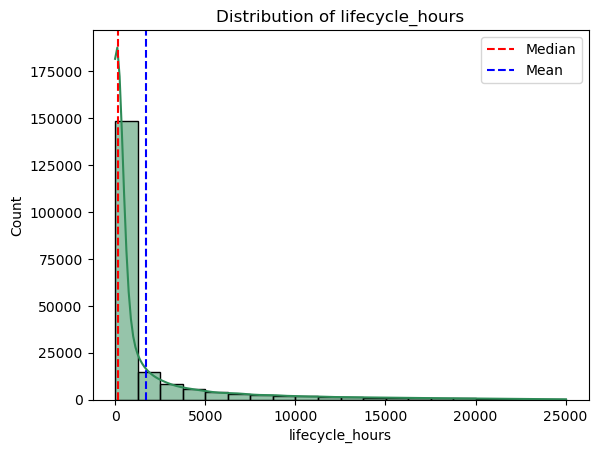

In [53]:
#LIFECYCLE IN HOURS
plot_histo(df_clean,'lifecycle_hours',20)

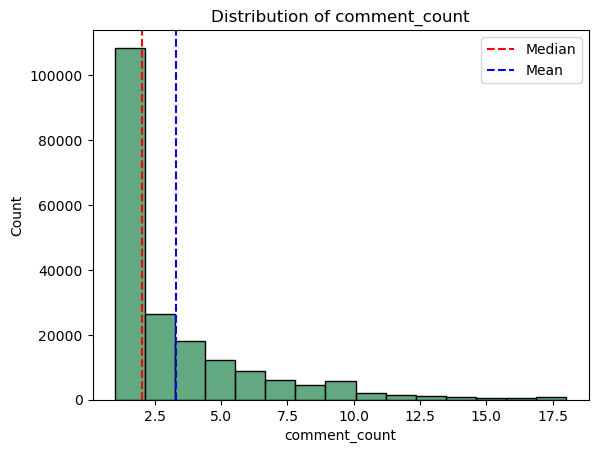

In [56]:
#comment_count
plot_histo(df_clean,'comment_count',15,kde=False)

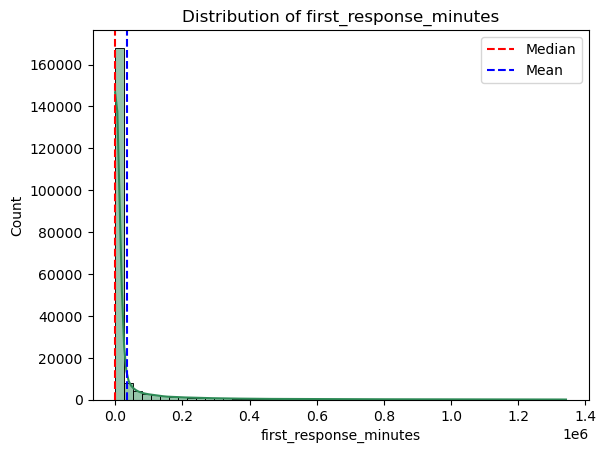

In [59]:
#first response min
plot_histo(df_clean,'first_response_minutes',50)


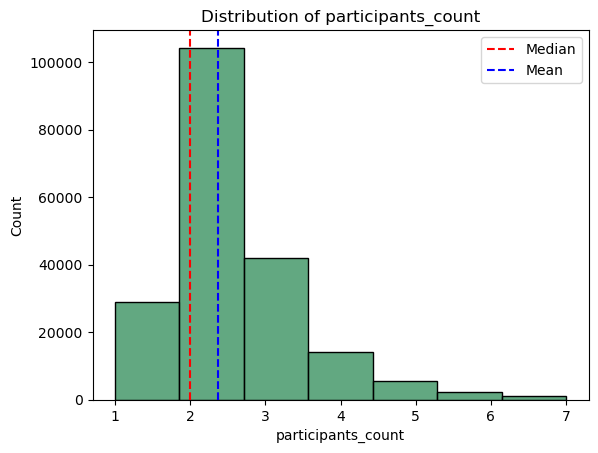

In [65]:
#participants_count
plot_histo(df_clean,'participants_count',7,kde=False)

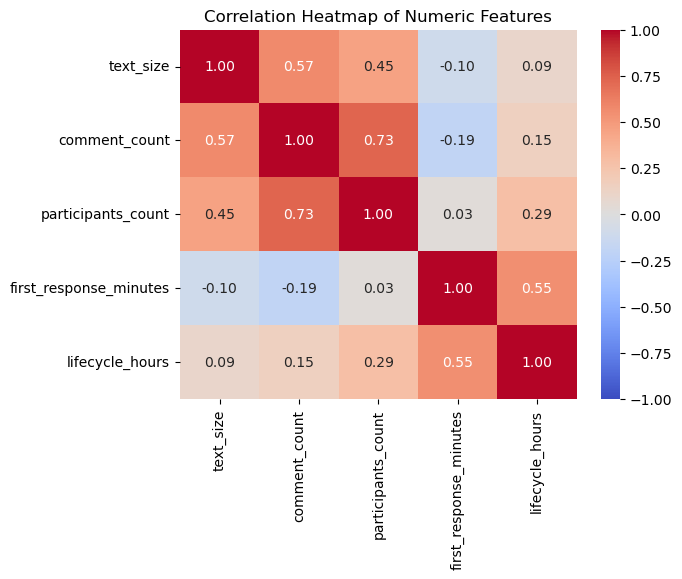

In [88]:
#Heatmap for the numeric variables USING FULL DATASET
corr = df3[num_cols].corr(method="spearman")  # or "pearson"
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

** No Multicolinearity exists between numeric variables 

/var/folders/nl/4plg4prn2w39wf8d2gclsmqc0000gn/T/ipykernel_24330/3258243945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=props.index.map({False: "False", True: "True"}), y=props.values,


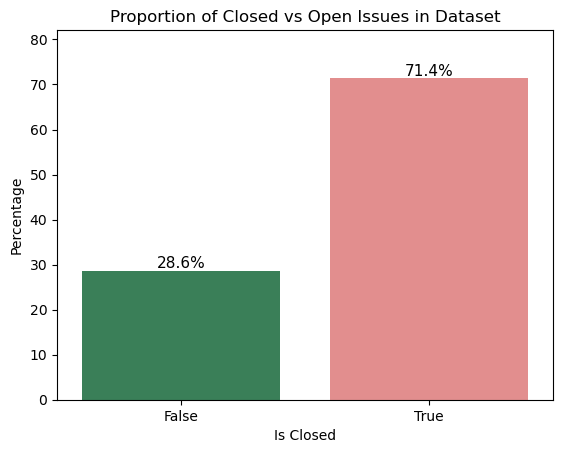

In [95]:

props = df3["is_closed"].value_counts(normalize=True).mul(100).reindex([False, True]).fillna(0)
ax = sns.barplot(x=props.index.map({False: "False", True: "True"}), y=props.values,
                 palette=["seagreen", "lightcoral"])
for p, val in zip(ax.patches, props.values):
    ax.annotate(f"{val:.1f}%", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11)
ax.set_ylim(0, props.max()*1.15)
ax.set_title("Proportion of Closed vs Open Issues in Dataset"); ax.set_xlabel("Is Closed"); ax.set_ylabel("Percentage")
plt.show()



### BIVARIATE ANALYIS

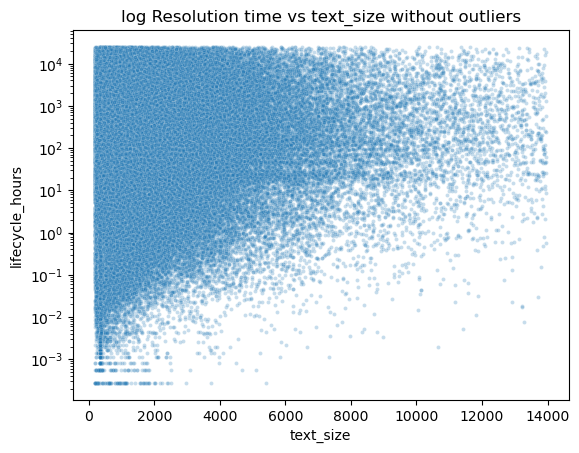

In [92]:
sns.scatterplot(data=df_clean, x="text_size", y="lifecycle_hours", s=8, alpha=0.25)
plt.yscale("log")
plt.title("log Resolution time vs text_size without outliers"); plt.show()

📊 Observations from Scatterplot (Resolution Time vs Text Size)

* Clustered at low text_size: Most issues are short (< 2000 characters) and dominate the dataset.

* High variance for long issues: As text size increases, resolution times spread out more, with some extremely long outliers.

* * Weak direct relationship: Longer text does not consistently mean longer resolution, but increases the likelihood of delays.

* Immediate resolutions present: A band of issues with near-zero resolution hours suggests trivial fixes or auto-closed tickets.

🔎 What This Tells Us

* text_size alone is a weak predictor of resolution time.

* However, it contributes signal by capturing variance and outlier likelihood.

* Best used in combination with other features (e.g., comment count, participants, first response time) rather than as a standalone driver.

* Confirms the need for a multifeature model to capture resolution dynamics effectively.

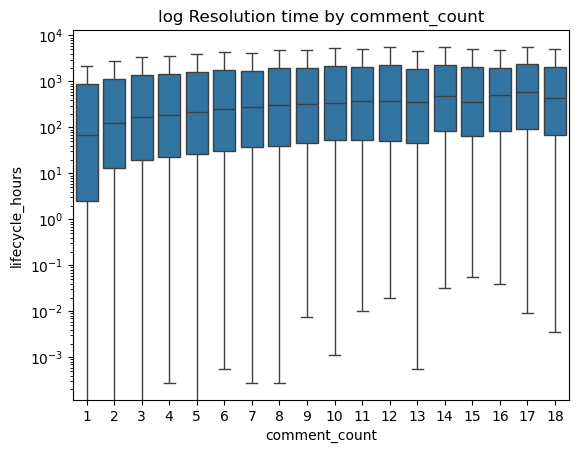

In [80]:
sns.boxplot(data=df_clean, x="comment_count", y="lifecycle_hours", showfliers=False)
plt.yscale("log")
plt.title("log Resolution time by comment_count")
plt.show()


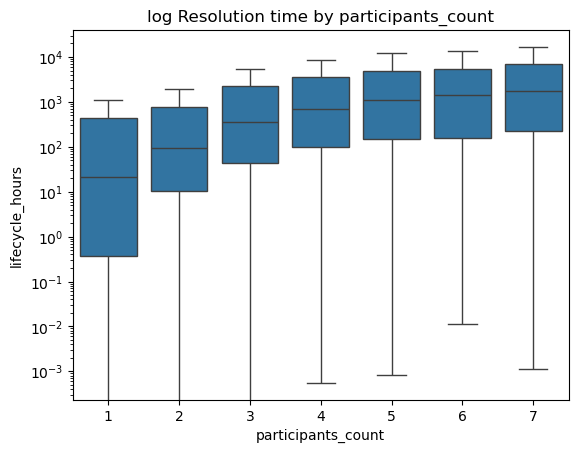

In [81]:
sns.boxplot(data=df_clean, x="participants_count", y="lifecycle_hours", showfliers=False)
plt.yscale("log")
plt.title("log Resolution time by participants_count")
plt.show()